In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
# loading the diabetes dataset to a pandas dataframe

df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# printing the first 5 rows of the dataset

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [36]:
# columns in dataset

df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
# information about dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# statistical measures of the data

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
Outcomes = df.Outcome
Outcomes.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [8]:
# values in features 

Outcomes.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

### Representation

0 : Non-Diabetic

1 : Diabetic

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
def Zerovalueimputation(dataset):
    Columns=['BloodPressure','BMI','Glucose','Insulin']
    for c in Columns:
        
         test_df=dataset[dataset[c]==0]
         y_train=dataset[c]
         x_train=dataset.drop(c,axis=1)
         X_test=test_df.drop(c,axis=1)
        
         lr=LinearRegression()
         lr.fit(x_train,y_train)
         y_predicted=lr.predict(X_test)
         dataset.loc[dataset[c]==0,c]=y_predicted

    return dataset

df1=Zerovalueimputation(dataset=df)

In [11]:
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,140.472103,33.6,0.627,50,1
1,1,85.0,66.0,29,65.823263,26.6,0.351,31,0
2,8,183.0,64.0,0,96.262920,23.3,0.672,32,1
3,1,89.0,66.0,23,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27,103.754985,36.8,0.340,27,0
765,5,121.0,72.0,23,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,0,12.303375,30.1,0.349,47,1


In [12]:
df1.eq(0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness               227
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [13]:
df1.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Visualizing with relationship plot

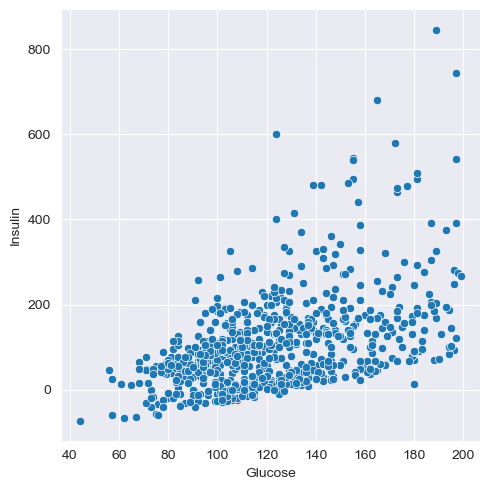

In [14]:
sns.set_style('darkgrid')
sns.relplot(x='Glucose',y='Insulin',data=df1)

Correlation

In [15]:
df1.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.130678,0.209580,-0.081672,-0.076477,0.021029,-0.033523,0.544341,0.221898
Glucose,0.130678,1.000000,0.236754,0.074747,0.493115,0.242596,0.138798,0.269528,0.495549
BloodPressure,0.209580,0.236754,1.000000,0.061844,0.040271,0.312447,0.019786,0.342900,0.163353
SkinThickness,-0.081672,0.074747,0.061844,1.000000,0.540631,0.394568,0.183928,-0.113970,0.074752
Insulin,-0.076477,0.493115,0.040271,0.540631,1.000000,0.249868,0.220820,-0.019620,0.202597
BMI,0.021029,0.242596,0.312447,0.394568,0.249868,1.000000,0.160409,0.033245,0.316693
DiabetesPedigreeFunction,-0.033523,0.138798,0.019786,0.183928,0.220820,0.160409,1.000000,0.033561,0.173844
Age,0.544341,0.269528,0.342900,-0.113970,-0.019620,0.033245,0.033561,1.000000,0.238356
Outcome,0.221898,0.495549,0.163353,0.074752,0.202597,0.316693,0.173844,0.238356,1.000000


Visualizing the correlation with heatmap

<Axes: >

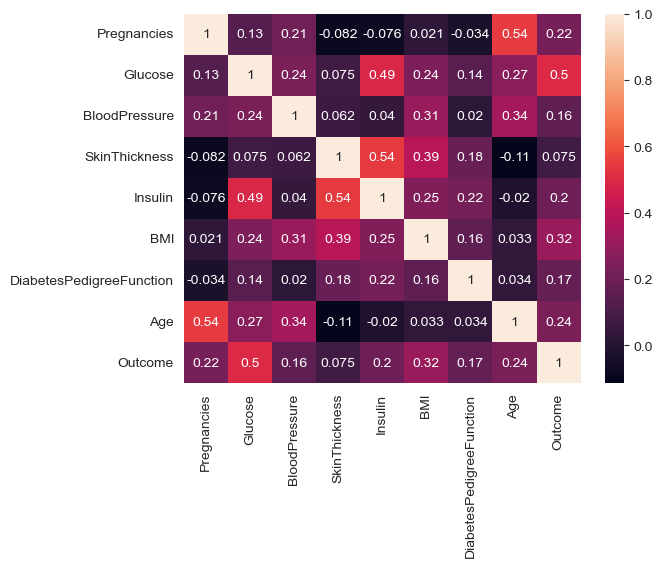

In [38]:
sns.heatmap(df1.corr(),annot=True)

### Classification

Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
x=df1[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y=df1.iloc[:,8]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [19]:
Log=LogisticRegression(random_state=1,max_iter=1000)
Log.fit(x_train,y_train)
y_pred_logistic=Log.predict(x_test)

Logistic Regression Score

In [20]:
Log.score(x_test,y_test)


0.8246753246753247

Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
Forest_Random=RandomForestClassifier(n_estimators=20,criterion='entropy',random_state=0)
Forest_Random.fit(x_train,y_train)
y_pred_random=Forest_Random.predict(x_test)


Random Forest score

In [23]:
Forest_Random.score(x_test,y_test)


0.7532467532467533

### Evaluation metrics

In [24]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

### For logistic regression

In [25]:
# calculating accuracy

print("Accuracy score for Logistic Regression:", accuracy_score(y_test,
                                  y_pred_logistic))

Accuracy score for Logistic Regression: 0.8246753246753247


In [26]:
# calculating precision

print("Precision score for Logistic Regression:", precision_score(y_test,
                                    y_pred_logistic,
                                    average="weighted"))
  


Precision score for Logistic Regression: 0.8199024206283736


In [27]:
# calculating recall

print('Recall for Logistic Regression:', recall_score(y_test,
                              y_pred_logistic,
                              average="weighted"))

Recall for Logistic Regression: 0.8246753246753247


In [28]:
# calculating f1 score
print('F1 score for logistic regression:', f1_score(y_test, y_pred_logistic,
                            average="weighted"))

F1 score for logistic regression: 0.8189313719780615


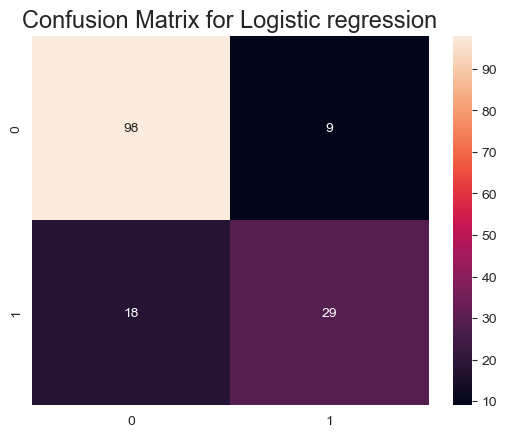

In [29]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred_logistic)
plt.title("Confusion Matrix for Logistic regression", fontsize = 17)
sns.heatmap(cm, annot = True)
plt.show()

### For Random Forest

In [30]:
# calculating accuracy

print("Accuracy score for random forest:", accuracy_score(y_test,
                                  y_pred_random))

Accuracy score for random forest: 0.7532467532467533


In [31]:
# calculating precision

print("Precision score for random forest:", precision_score(y_test,
                                    y_pred_random,
                                    average="weighted"))
  


Precision score for random forest: 0.7456277803784819


In [32]:
# calculating recall

print('Recall for random forest:', recall_score(y_test,
                              y_pred_random,
                              average="weighted"))

Recall for random forest: 0.7532467532467533


In [33]:
# calculating f1 score

print('F1 score for random forest:', f1_score(y_test, y_pred_random,
                            average="weighted"))

F1 score for random forest: 0.7481995277449822


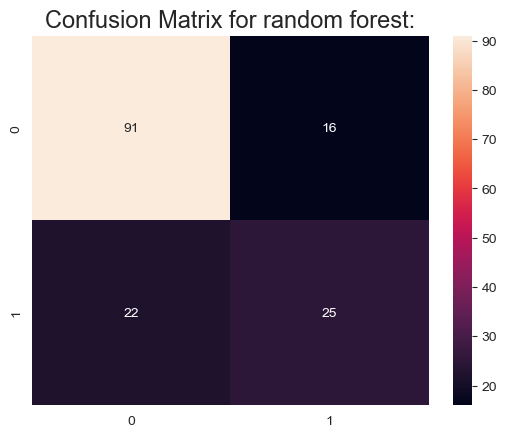

In [34]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred_random)
plt.title("Confusion Matrix for random forest:", fontsize = 17)
sns.heatmap(cm, annot = True)
plt.show()

### Conclusion

#### From the observation through the accuracy score, precision score, Recall, F1 score and confusion matrix of logistic regression and random forest, we can clearly say that the Logistic Regression classification algorithm performs well in predicting the diabetes.

#### Predicting the diabetes of a patient there are some factors are important such as Glucose,Insulin,BMI,Age plays a major role.